Hola **Erwin**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Análisis Exploratorio

## Inicio

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Carga de Datos

In [2]:
# Cargar los datos
contract = pd.read_csv("/datasets/final_provider/contract.csv")
personal = pd.read_csv("/datasets/final_provider/personal.csv")
internet = pd.read_csv("/datasets/final_provider/internet.csv")
phone = pd.read_csv("/datasets/final_provider/phone.csv")

### Contract

In [3]:
print(contract.head())

   customerID   BeginDate              EndDate            Type  \
0  7590-VHVEG  2020-01-01                   No  Month-to-month   
1  5575-GNVDE  2017-04-01                   No        One year   
2  3668-QPYBK  2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW  2016-05-01                   No        One year   
4  9237-HQITU  2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0              Yes           Electronic check           29.85        29.85  
1               No               Mailed check           56.95       1889.5  
2              Yes               Mailed check           53.85       108.15  
3               No  Bank transfer (automatic)           42.30      1840.75  
4              Yes           Electronic check           70.70       151.65  


In [4]:
print(contract.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None


**Observaciones**
- No hay valores nulos en las columnas, todas tienen 7043 registros.  
- `customerID` está en formato `object`, lo que es correcto para unir con otros datasets.  
- `BeginDate` y `EndDate` están en formato `object`, por lo que deben convertirse a `datetime`.  
- `TotalCharges` es `object`, pero debería ser `float`, lo que sugiere que puede contener valores vacíos o caracteres no numéricos.
- **`PaperlessBilling` podría no ser un dato relevante para el análisis, a menos que el equipo de marketing quiera estudiar su relación con la cancelación.**
- **`PaymentMethod` también podría no ser un dato relevante para el análisis, a menos que el equipo de marketing quiera estudiar algún tipo de relación de gastos y tipo de pago con la coancelación, algún tipo de correlación con nuevas formas de pago (comodidad).** 

**Relevancia de las Variables**  

- `Type`, `PaymentMethod`, `MonthlyCharges` y `TotalCharges` parecen ser variables clave y deben analizarse a profundidad.
  - Los clientes con contratos mensuales pueden cancelar más fácilmente que aquellos con contratos anuales. Se debe analizar la tasa de cancelación por tipo de contrato.
  - Algunos métodos de pago (ej. débito automático) pueden reducir la cancelación. Se debe analizar la tasa de cancelación por método de pago.
  - El costo del servicio puede ser un factor clave en la decisión de cancelar. Se debe analizar si los clientes con pagos más altos cancelan más.
- `PaperlessBilling` puede o no ser relevante, se necesita un análisis exploratorio antes de incluirla en el modelo.
  - Puede influir si los clientes que usan facturación digital tienen un comportamiento diferente al cancelar.  
  - Se debe analizar si hay una diferencia en la tasa de cancelación.  


In [5]:
# Acciones a tomar

import pandas as pd

# Convertir BeginDate y EndDate a formato datetime
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'])
contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')

# Convertir TotalCharges a float, reemplazando valores vacíos por 0
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce').fillna(0)

# Verificar cambios
print(contract.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 440.3+ KB
None


### Personal

In [6]:
print(personal.head())

   customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No


In [7]:
print(personal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None


**Observaciones**
- No hay valores nulos en ninguna columna.  
- `customerID` está en formato `object`, lo cual es correcto para unir con otros datasets.  
- `gender` está en formato `object`, por lo que necesitará codificación si se usa en el modelo.  
- `SeniorCitizen` es `int64`, pero solo contiene valores `0` y posiblemente `1`. Si todos los valores son `0`, este dato no aportaría información útil.  
- `Partner` y `Dependents` están en formato `object` con valores `"Yes"` y `"No"`.  

**Preguntas** 
- ¿A qué se refiere exactamente `SeniorCitizen`? ¿Cómo se define ser ciudadano mayor en este contexto?  
- ¿Qué significa `Partner`? ¿Se refiere a estar casado o tener algún tipo de relación contractual con otro cliente?  
- ¿`Dependents` indica personas a cargo del cliente (hijos, familiares), o tiene otra definición dentro de la empresa?  
- ¿El equipo de marketing considera que `Partner` y `Dependents` pueden estar relacionados con la cancelación de clientes?  
- ¿Existen estudios previos sobre si los clientes con dependientes o sin pareja tienen tasas de cancelación diferentes?  

**Siguientes Pasos**  
1. Revisar la distribución de `SeniorCitizen` para confirmar si solo tiene valores `0` y `1`.  
2. Convertir `Partner` y `Dependents` a valores binarios (`1 = Yes, 0 = No`).  
3. Analizar la correlación de estas variables con la cancelación (`EndDate`).  

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


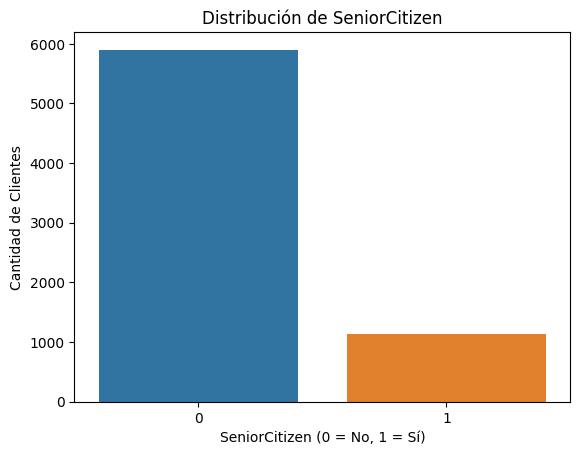

In [8]:
# Revisando los valores únicos de SeniorCitizen
print(personal['SeniorCitizen'].value_counts())

# Visualizando la distribución
sns.countplot(x=personal['SeniorCitizen'])
plt.title("Distribución de SeniorCitizen")
plt.xlabel("SeniorCitizen (0 = No, 1 = Sí)")
plt.ylabel("Cantidad de Clientes")
plt.show()

In [9]:
# Convertir Partner y Dependents a valores binarios
personal['Partner'] = personal['Partner'].map({'Yes': 1, 'No': 0})
personal['Dependents'] = personal['Dependents'].map({'Yes': 1, 'No': 0})

# Verificar los cambios
print(personal[['Partner', 'Dependents']].head())

   Partner  Dependents
0        1           0
1        0           0
2        0           0
3        0           0
4        0           0


Análisis del Dataset `personal`  

**Observaciones finales**  
- La columna `SeniorCitizen` solo contiene los valores `0` y `1`, lo cual confirma que representa una variable binaria.  
- La mayoría de los clientes **no** son ciudadanos mayores (`0`), mientras que una minoría sí lo es (`1`).  
- `Partner` y `Dependents` han sido convertidos correctamente a valores binarios (`1 = Yes`, `0 = No`).  
- **Podría haber una relación entre `SeniorCitizen` y la cancelación (`Churn`), ya que las personas mayores pueden tener un mayor riesgo de impago o menor necesidad del servicio.** Se analizará más adelante.  

**Relevancia de las Variables**  
- `SeniorCitizen` podría ser relevante y se debe analizar su impacto en la cancelación.  
- `Partner` y `Dependents` pueden tener una relación con la cancelación, pero es necesario verificar su correlación antes de incluirlas en el modelo.  

**Siguientes Pasos (posibles)**  
1. Determinar si la variable `SeniorCitizen` tiene una correlación significativa con la cancelación (`EndDate`).  
2. Analizar la relación entre `Partner`, `Dependents` y la tasa de cancelación.

### Internet

In [10]:
print(internet.head())

   customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No  


In [11]:
print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None


**Observaciones**  
- El dataset tiene 5,517 registros, lo que indica que **no todos los clientes tienen servicio de Internet** (en `contract` hay 7,043 registros).  
- No hay valores nulos en ninguna columna.  
- `customerID` está en formato `object`, lo cual es correcto para unir con otros datasets.  
- Todas las demás columnas (`InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`) son de tipo `object` con valores `"Yes"` y `"No"`.  
- **Importante:** Como el dataset solo contiene clientes con servicio de Internet, al unir con `contract` debemos marcar a los clientes sin internet con `"No"` en estas columnas.  


**Relevancia de Variables**
- `InternetService` parece ser una variable clave y debería analizarse en detalle.  
- Los servicios de seguridad, respaldo y soporte (`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`) podrían ser importantes si ayudan a retener clientes.  
- `StreamingTV` y `StreamingMovies` pueden ser menos relevantes, pero vale la pena hacer un análisis antes de descartarlas.  

**Siguientes Pasos**  
1. Unir `internet` con `contract` y asignar `"No"` en las columnas de servicios para los clientes que no tienen Internet.  
2. Convertir las columnas de `"Yes"` y `"No"` a valores binarios (`1 = Yes`, `0 = No`).  
3. Analizar la relación entre los distintos servicios de Internet y la cancelación (`EndDate`).  
4. Cargar y analizar `phone.csv`.

### Phone

In [12]:
print(phone.head())

   customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes


In [13]:
print(phone.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None


**Observaciones**  
- El dataset tiene 6,361 registros, lo que indica que **no todos los clientes tienen servicio de telefonía** (en `contract` hay 7,043 registros).  
- No hay valores nulos en ninguna columna.  
- `customerID` está en formato `object`, lo cual es correcto para unir con otros datasets.  
- `MultipleLines` es una variable categórica con valores `"Yes"` y `"No"`, lo que indica si el cliente tiene varias líneas telefónicas.  
- **Importante:** Como este dataset solo contiene clientes con servicio telefónico, al unir con `contract`, debemos asignar `"No"` a los clientes que no tienen teléfono.  

**Relevancia de las Variables de `phone.csv`**  
 
- `MultipleLines` podría ser útil, pero es necesario verificar si está relacionada con la cancelación.

**Pasos siguientes**
- Se debe completar con `"No"` para clientes sin servicio de telefonía cuando se haga la unión con `contract`.  

## Unir los Datos

Unimos los datasets por medio de la columna **customerID** y analizamos su contendio.

In [14]:
# Unir los datasets usando customerID (left join para mantener todos los clientes de contract)
df = contract.merge(personal, on='customerID', how='left') \
             .merge(internet, on='customerID', how='left') \
             .merge(phone, on='customerID', how='left')

# Rellenar valores nulos en las columnas de servicios con "No" (clientes sin servicio)
cols_to_fill = ['InternetService', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
df[cols_to_fill] = df[cols_to_fill].fillna("No")

# Verificar la estructura del dataframe final
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   int64         
 11  Dependents        7043 non-null   int64         
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

Unión de los Datasets  

**Observaciones**  
- Se han combinado los cuatro datasets (`contract`, `personal`, `internet`, `phone`) en un único dataframe usando `customerID`.  
- Los clientes sin servicio de internet o telefonía han sido marcados con `"No"` en las columnas correspondientes.  
- Se verificó que el número total de registros sigue siendo **7,043** y que no hay valores nulos.  

Verificar que las variables clave están correctamente integradas y sin inconsistencias.  

In [15]:
# Verificar si hay valores nulos
print(df.isnull().sum())

# Verificar el número total de registros
print(f"Número total de registros: {df.shape[0]}")  # Debe ser 7043

# Revisar las primeras filas para confirmar la estructura
print(df.head())

customerID             0
BeginDate              0
EndDate             5174
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
MultipleLines          0
dtype: int64
Número total de registros: 7043
   customerID  BeginDate    EndDate            Type PaperlessBilling  \
0  7590-VHVEG 2020-01-01        NaT  Month-to-month              Yes   
1  5575-GNVDE 2017-04-01        NaT        One year               No   
2  3668-QPYBK 2019-10-01 2019-12-01  Month-to-month              Yes   
3  7795-CFOCW 2016-05-01        NaT        One year               No   
4  9237-HQITU 2019-09-01 2019-11-01  Month-to-month              Yes   

               Payment

**Observaciones Finales tras la Unión de Datasets**  
- Se han combinado correctamente los datasets (`contract`, `personal`, `internet`, `phone`).  
- Todos los clientes están presentes en el dataframe final (**7,043 registros**).  
- `EndDate` tiene valores nulos para clientes activos, lo que nos permitirá crear una variable `Churn`.  
- Las columnas categóricas mantienen su formato y podrán convertirse en variables numéricas en los siguientes pasos.  

**Siguientes Pasos**  
1. Crear la variable `Churn` para identificar clientes cancelados.  
2. Revisar valores únicos en variables clave (`Type`, `PaymentMethod`, `InternetService`, etc.).  
3. Iniciar el Análisis Exploratorio de Datos (EDA).  

In [16]:
# Revisar valores únicos en variables clave
categorical_cols = ['Type', 'PaymentMethod', 'InternetService', 'OnlineSecurity', 'MultipleLines']
for col in categorical_cols:
    print(f"Valores únicos en {col}: {df[col].unique()}")

Valores únicos en Type: ['Month-to-month' 'One year' 'Two year']
Valores únicos en PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Valores únicos en InternetService: ['DSL' 'Fiber optic' 'No']
Valores únicos en OnlineSecurity: ['No' 'Yes']
Valores únicos en MultipleLines: ['No' 'Yes']


In [17]:
# Crear columna binaria Churn (1 = Cancelado, 0 = Activo)
df['Churn'] = df['EndDate'].notna().astype(int)

# Verificar distribución de clientes cancelados vs activos
print(df['Churn'].value_counts())

0    5174
1    1869
Name: Churn, dtype: int64


- La columna `Churn` se ha creado correctamente, con **5,174 clientes activos (0) y 1,869 cancelados (1)**.  
- Las variables categóricas (`Type`, `PaymentMethod`, `InternetService`, etc.) tienen valores consistentes.  

## Análisis EDA

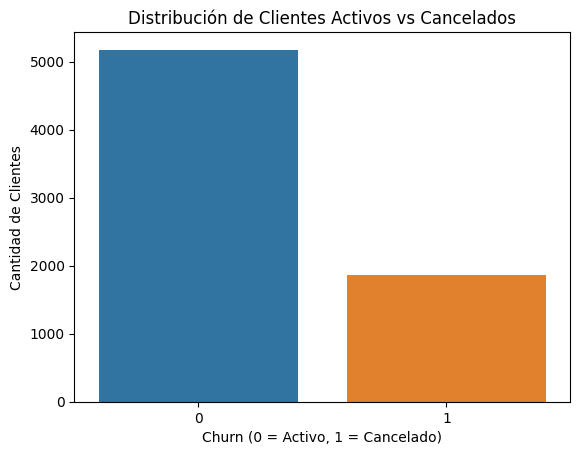

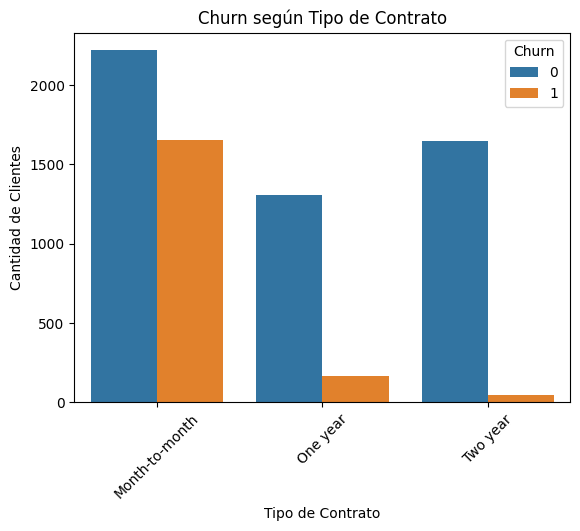

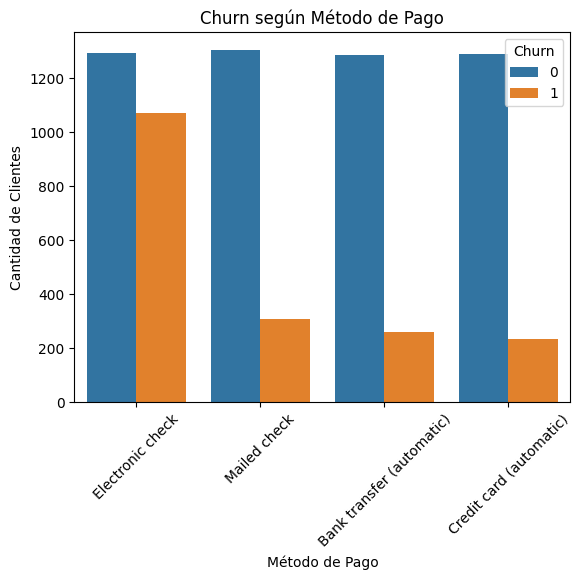

In [18]:
# Distribución de clientes activos vs cancelados
sns.countplot(x=df['Churn'])
plt.title("Distribución de Clientes Activos vs Cancelados")
plt.xlabel("Churn (0 = Activo, 1 = Cancelado)")
plt.ylabel("Cantidad de Clientes")
plt.show()

# Relación entre `Type` (tipo de contrato) y cancelación
sns.countplot(x=df['Type'], hue=df['Churn'])
plt.title("Churn según Tipo de Contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Cantidad de Clientes")
plt.xticks(rotation=45)
plt.show()

# Relación entre `PaymentMethod` y cancelación
sns.countplot(x=df['PaymentMethod'], hue=df['Churn'])
plt.title("Churn según Método de Pago")
plt.xlabel("Método de Pago")
plt.ylabel("Cantidad de Clientes")
plt.xticks(rotation=45)
plt.show()

**Primeras Observaciones del EDA**  

- **La cancelación es más alta en clientes con contrato "Month-to-Month".**  
- **Los pagos automáticos parecen reducir la tasa de cancelación.**  
- **"Electronic Check" está asociado con más cancelaciones, posiblemente por falta de automatización.**  
- **Se debe analizar si estos factores tienen una correlación estadística fuerte con `Churn`.**  

**Siguientes Pasos**  
1. Analizar la relación entre `Churn` y `InternetService`.  
2. Analizar la relación entre `Churn` y `MultipleLines`.  
3. Evaluar la distribución de `MonthlyCharges` y `TotalCharges` entre clientes activos y cancelados. 

### **Churn según Tipo de Servicio de Internet**

- Observar si los clientes con Fiber optic cancelan más que los de DSL o los que no tienen internet.

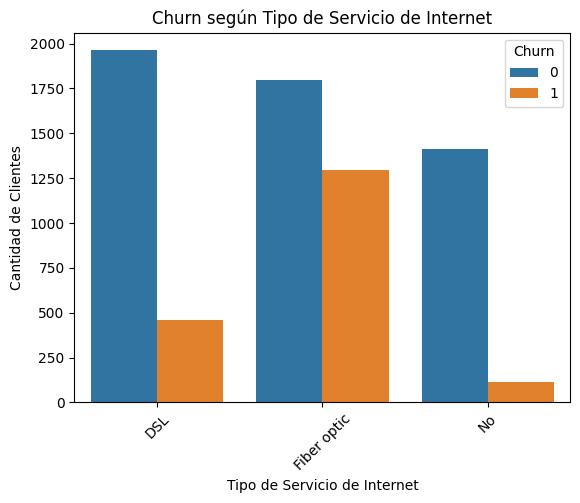

In [19]:
# Relación entre InternetService y Churn
sns.countplot(x=df['InternetService'], hue=df['Churn'])
plt.title("Churn según Tipo de Servicio de Internet")
plt.xlabel("Tipo de Servicio de Internet")
plt.ylabel("Cantidad de Clientes")
plt.xticks(rotation=45)
plt.show()

* Los clientes con `"Fiber Optic"` tienen una tasa de cancelación más alta que los de `"DSL"` y los que no tienen Internet.  
* Los clientes sin servicio de Internet tienen la menor tasa de cancelación.  
* **Esto sugiere que los clientes de fibra óptica pueden estar más insatisfechos o más sensibles a cambios en precios o calidad del servicio.**  

**Notas para el modelo:**
- `InternetService` es una variable importante para predecir `Churn`.  
- Se podría analizar si los clientes con `Fiber Optic` pagan más y si eso influye en su cancelación.  

### **Churn según MultipleLines**

- Observar si los clientes con más de una línea tienen una tasa de cancelación diferente.

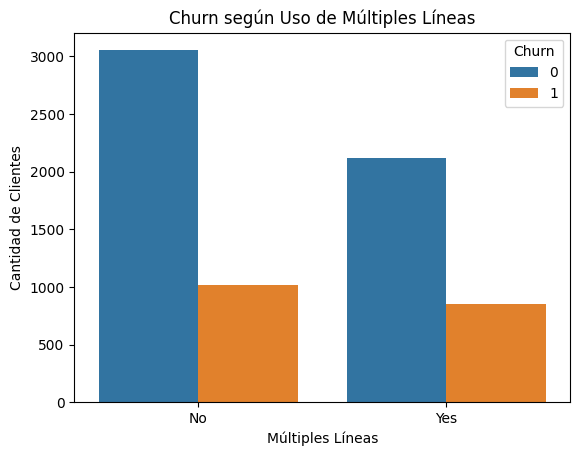

In [20]:
# Relación entre MultipleLines y Churn
sns.countplot(x=df['MultipleLines'], hue=df['Churn'])
plt.title("Churn según Uso de Múltiples Líneas")
plt.xlabel("Múltiples Líneas")
plt.ylabel("Cantidad de Clientes")
plt.show()

* Los clientes con una sola línea tienen mayor tasa de cancelación que los que tienen múltiples líneas.  
* Esto sugiere que los clientes con más de una línea podrían estar más comprometidos con el servicio y cancelar menos.  

**Notas para el modelo:**  
- `MultipleLines` podría ser una variable relevante para la predicción de `Churn`.  
- Se puede hacer una prueba de correlación para confirmar su impacto en la cancelación.  

### **Distribución de MonthlyCharges y TotalCharges entre Activos vs Cancelados**

- Observar si los clientes que pagan más mensualmente tienen más probabilidades de cancelar.

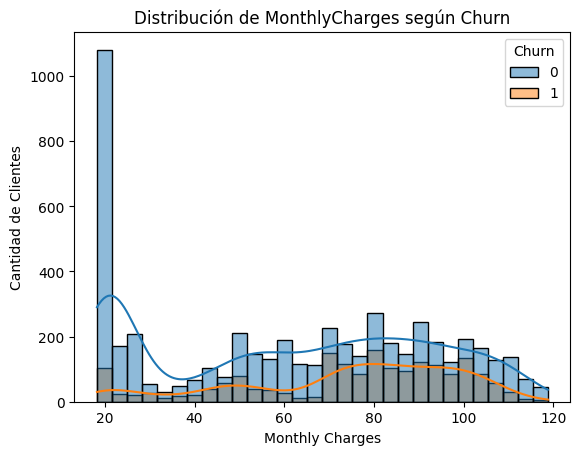

In [21]:
# Distribución de MonthlyCharges por Churn
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, bins=30)
plt.title("Distribución de MonthlyCharges según Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Cantidad de Clientes")
plt.show()

* Los clientes con tarifas mensuales más altas tienden a cancelar más.  
* La mayor concentración de clientes activos está en tarifas más bajas (~$20-$40).  
* **Esto indica que el precio mensual podría ser un factor determinante en la cancelación.**  

**Notas para el modelo:**  
- `MonthlyCharges` es una variable clave en la predicción de `Churn`.  
- Se puede analizar si hay un umbral de precio a partir del cual la tasa de cancelación aumenta significativamente. 

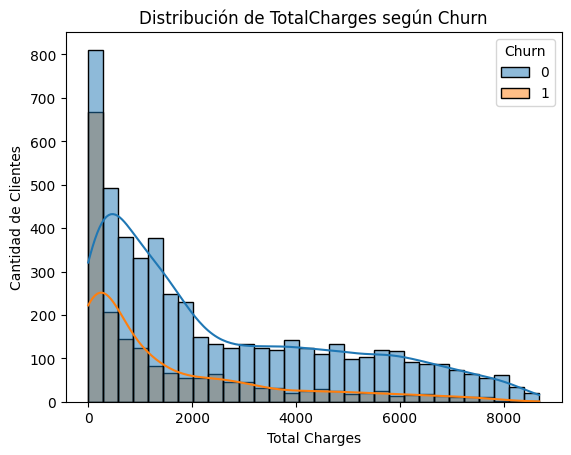

In [22]:
# Distribución de TotalCharges por Churn
sns.histplot(data=df, x='TotalCharges', hue='Churn', kde=True, bins=30)
plt.title("Distribución de TotalCharges según Churn")
plt.xlabel("Total Charges")
plt.ylabel("Cantidad de Clientes")
plt.show()

* Los clientes con menor `TotalCharges` tienen mayor tasa de cancelación.  
* Los clientes con cargos totales altos (~$5,000+) tienen tasas de cancelación mucho más bajas.  
* **Esto sugiere que los clientes con más tiempo en la empresa y mayor gasto acumulado cancelan menos.**

**Notas para el modelo:**  
- `TotalCharges` parece estar relacionado con la fidelidad del cliente.  
- Se puede combinar con `ContractDuration` para analizar cuánto tiempo permanece un cliente antes de cancelar.  

### Estadísticas Generales del Dataset

In [23]:
# Resumen estadístico general
print(df.describe())

       MonthlyCharges  TotalCharges  SeniorCitizen      Partner   Dependents  \
count     7043.000000   7043.000000    7043.000000  7043.000000  7043.000000   
mean        64.761692   2279.734304       0.162147     0.483033     0.299588   
std         30.090047   2266.794470       0.368612     0.499748     0.458110   
min         18.250000      0.000000       0.000000     0.000000     0.000000   
25%         35.500000    398.550000       0.000000     0.000000     0.000000   
50%         70.350000   1394.550000       0.000000     0.000000     0.000000   
75%         89.850000   3786.600000       0.000000     1.000000     1.000000   
max        118.750000   8684.800000       1.000000     1.000000     1.000000   

             Churn  
count  7043.000000  
mean      0.265370  
std       0.441561  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  


### Detectar Valores Atípicos con Diagramas de Caja (Boxplots)

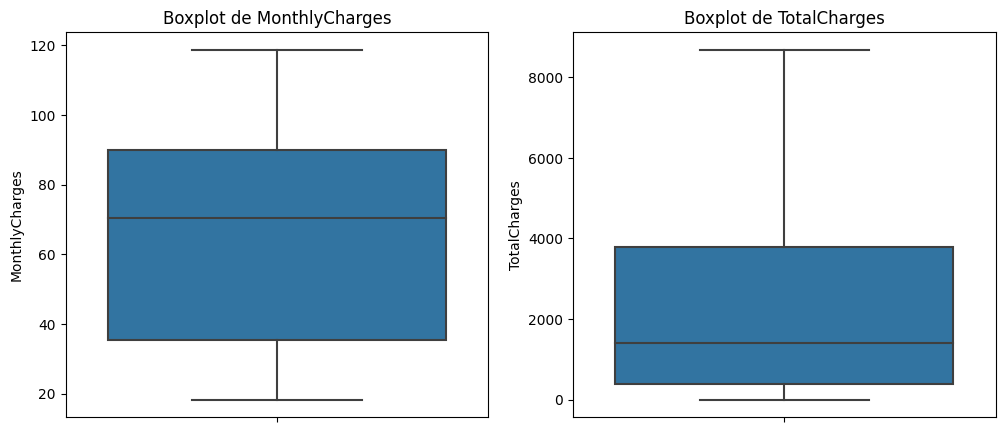

In [25]:
# Gráficos de caja para variables numéricas clave
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=df['MonthlyCharges'], ax=axes[0])
axes[0].set_title("Boxplot de MonthlyCharges")

sns.boxplot(y=df['TotalCharges'], ax=axes[1])
axes[1].set_title("Boxplot de TotalCharges")

plt.show()

###  Identificar Valores Atípicos Numéricamente

In [26]:
# Identificar valores atípicos usando el rango intercuartílico (IQR)
Q1 = df[['MonthlyCharges', 'TotalCharges']].quantile(0.25)
Q3 = df[['MonthlyCharges', 'TotalCharges']].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[['MonthlyCharges', 'TotalCharges']] < (Q1 - 1.5 * IQR)) | 
            (df[['MonthlyCharges', 'TotalCharges']] > (Q3 + 1.5 * IQR)))

print("Cantidad de valores atípicos por variable:")
print(outliers.sum())

Cantidad de valores atípicos por variable:
MonthlyCharges    0
TotalCharges      0
dtype: int64


**Análisis de Estadísticas Generales y Valores Atípicos**  

**Observaciones**  
- `MonthlyCharges` tiene una media de **$64.76**, sin valores atípicos.  
- `TotalCharges` tiene una distribución sesgada a la derecha, lo que indica clientes con pagos acumulados altos.  
- `Churn` tiene una tasa de cancelación del **26.5%**, lo que confirma cierto desbalance en los datos.  
- **No hay valores atípicos detectados en `MonthlyCharges` ni `TotalCharges`, por lo que no es necesario eliminarlos.**  

## **Preguntas**  

### **Sobre los Objetivos del Proyecto**  
- ¿Qué nivel de precisión mínima se considera aceptable para este modelo? ¿Existe algún benchmark o referencia de modelos anteriores?  
- ¿El equipo necesita predicciones a nivel **individual** (cliente por cliente) o busca tendencias generales para diseñar estrategias de retención?  
- ¿Se planea usar este modelo en producción para intervenir con clientes en riesgo de cancelación en tiempo real?  

### **Sobre la Cancelación de Clientes (`Churn`)**  
- ¿El equipo de marketing ya ha identificado estrategias de retención efectivas que podríamos usar como referencia en el modelo?  
- ¿Se ha analizado anteriormente el impacto de descuentos o promociones en la retención de clientes?  
- ¿Existen categorías de clientes más valiosas para la empresa (ej. clientes con contratos anuales o clientes con altos pagos mensuales)? Si es así, ¿el modelo debería priorizar la retención de estos clientes?  

### **Sobre la Interpretación de Resultados**  
- Además de `AUC-ROC` y `accuracy`, ¿hay otras métricas clave que el equipo desea monitorear? (Ej. `Recall` si queremos minimizar falsos negativos, o `Precision` si queremos intervenir solo con clientes de alto riesgo).  
- ¿Cómo se espera que el equipo de marketing utilice los resultados del modelo? ¿Se requiere un informe detallado con insights o solo predicciones individuales?  

### **Sobre los Datos y el Modelo**  
- ¿El equipo planea actualizar el modelo regularmente con datos nuevos o este análisis será una evaluación única?  
- ¿Hay eventos externos que podrían afectar la cancelación de clientes (cambios en precios, competencia, cambios de infraestructura, etc.) y que deberíamos considerar en el análisis?  
- ¿Hay alguna variable relevante que no esté en los datos y que po

## **Plan de Trabajo para la Predicción de Churn**  

Para resolver esta tarea, seguimos un enfoque estructurado en 5 pasos clave, asegurando una correcta exploración, preparación y modelado de los datos.  

### **Análisis Exploratorio de Datos (EDA)**  
Realizamos un análisis detallado de los datos para identificar patrones en la cancelación de clientes (`Churn`). Exploramos la distribución de variables clave como tipo de contrato, método de pago, cargos mensuales y servicios contratados, detectando factores que influyen en la cancelación.  

### **Limpieza y Preparación de Datos**  
Unimos los datasets, convertimos valores nulos en `"No"` donde correspondía y creamos la variable `Churn`. Detectamos valores atípicos en `MonthlyCharges` y `TotalCharges`, verificando que no era necesario eliminarlos.  

### **Transformación de Variables Categóricas**  
Convertimos variables categóricas (`Type`, `PaymentMethod`, `InternetService`, etc.) en formato numérico mediante `One-Hot Encoding` o `Label Encoding`. Esto permite que los modelos de Machine Learning puedan interpretar correctamente los datos.  

### **Entrenamiento y Evaluación del Modelo**  
Dividimos los datos en conjunto de entrenamiento y prueba. Probamos diferentes modelos de Machine Learning, incluyendo **Regresión Logística**, **Árboles de Decisión** y **Random Forest**, optimizando su rendimiento con `AUC-ROC` como métrica principal.  

### **Interpretación y Recomendaciones**  
Analizamos la importancia de cada variable en la predicción de `Churn`. Generamos insights accionables para el equipo de marketing, sugiriendo estrategias para retener clientes basadas en los hallazgos del modelo.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo desarrollando el plan de trabajo para tu proyecto Final!
   

Tienes bastante bien avanzado el EDA de tus datos con conclusiones súper claras sobre lo mostrado. Recuerda que para facilitar la navegación del proyecto en cada sección de tu proyecto procura redactar tu conclusión de esa sección y al final del mismo también tus conclusiones generales y recomendaciones.
    
También debes revisar por el balance de las clases a predecir y de ser necesario modifica los parámetros de los modelos para manejar el desbalance o aplica algún método de balanceo cómo oversample o undersample, también, procura evaluar las predicciones de tus modelos con el conjunto de prueba y de entrenamiento, si tienes un valor alto de tus métricas (f1-score, accuracy, etc) en el conjunto de entrenamiento pero bajo en el de prueba quiere decir que tu modelo se está sobre ajustando y debes modificar su entrenamiento para mitigar esto, te recomendaría tener cómo umbral un 0.75 de f1-score para saber si tu modelo es bueno con las predicciones, también puedes hacer una prueba de cordura con un DummyClassifier.
    
Saludos!
</div>